# XY-calibration (F1)

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


# Summary

| #  | Name                               | Done                    | Time supposed | Effective time | |
|----|------------------------------------|-------------------------|---------------|----------------|-|
| 1  | Rotate mask carousel               | <input type="checkbox"> | 2             |                | |
| 2  | Take diffuse image                 | <input type="checkbox"> | 2             |                | |
| 3  | Set guider at best focus           | <input type="checkbox"> | 5             |                | |
| 4  | Align siderostat frames            | <input type="checkbox"> | 0             |                | |
| 5  | Go to guider reference             | <input type="checkbox"> | 2             |                | |
| 6  | Set UV/guider best focus offset    | <input type="checkbox"> | 2             |                | |
| 7  | Rotate mask carousel               | <input type="checkbox"> | 3             |                | |
| 8  | Through focus in UV                | <input type="checkbox"> | 5             |                | |
| 9  | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 10 | Go through the list of slits       | <input type="checkbox"> | 20            |                | |
| 11 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 12 | Update model                       | <input type="checkbox"> | 10            |                | |
| 13 | Rotate carousel to science mask    | <input type="checkbox"> | 3             |                | |
| 14 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 15 | Check new model on Science mask    | <input type="checkbox"> | 20            |                | |
| 16 | Note science-mask guider ref point | <input type="checkbox"> | 2             |                | |
| 17 | Go through the list of GS          | <input type="checkbox"> | 15            |                | |
| 18 | Through focus guide star 1         | <input type="checkbox"> | 5             |                | |
| 19 | Track mask to guider changes       | <input type="checkbox"> | 2             |                | |

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## initialization from last xy calib
---------------------------------

In [3]:
# prerequisites:
previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
target_filename = 'Calibration/Targets/2022/targets_F1.txt'
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

In [4]:
# load model from previous XY calib 
G2UV = Guider2UV(filename=previous_xy_mapping)
print(G2UV)

## eventually reset the guider-scmask rotation to 0 and magnification correction to 0.
G2UV.mask_rotation = 0.0*u.arcmin
G2UV.FieldP.gamma = 1. 

# if you already know the approx angular distance between guidercenter and FOVcenter, set it:
#G2UV.FOV_center_guider_coord = coordinates.SkyCoord(delta_x*u.deg, # x guider axis (x axis in guider local frame, see XYcalib figure)
#                                                    delta_y*u.deg, # y guider axis (y axis guider local frame, see XYcalib figure)
#                                                    frame = G2UV.GuiderP.localframe)


# load targets
F1 = Table.read(target_filename, format='ascii')

# load mask-UVdetector mappings
mask_det_map = Mapping(mask_det_map_file)



FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.17639951, 0.0154012)>
FOV center pixel position in guider [array(1338.56657245), array(600.7867847)]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (32.19, -5.688)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.392728151  36.4185638082  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024551548564194  0.00024661678545423  
NAXIS : 0  0

    mask_rotation: 83.96815071133501 arcmin
 

## Alternative initialisation for new fields:
---------------------------------------

In [5]:

# # prerequisites:
# previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
# mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# target_filename = 'Calibration/Targets/2022/targets_F1.txt'
# mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
# new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

# f_ra, f_dec, f_rot = 0, 0, 0
# Field_center=coordinates.SkyCoord(f_ra * u.deg, f_dec * u.deg)
# # get FOVcenter & guider wcs from another field
# #  put pkl from a functionning mapping from another field
# G2UVother = Guider2UV(filename=previous_xy_mapping)
# FOVcenter = G2UVother.FOV_center_guider_coord
# guider_wcs = G2UVother.GuiderP.w
# G2UV = Guider2UV(Field_center=Field_center,
#                  Field_rotation= f_rot * u.deg,
#                  Field_gamma=1.0,  # platescale correction (need to update the polynomial in the MaskAstrometry.py)
#                  FOVcenter_guider_coord=FOVcenter,
#                  guider_wcs = guider_wcs,
#                  )
                 
# FNEW = Table.read(target_filename, format='ascii')
# mask_det_map = Mapping(mask_det_map_file)

# # print(G2UV)

## 1-  Rotate mask carousel
## 2- Diffuse UV image

In [8]:
# data1 = fits.open(mapping_diffuse_image)[0].data[1404:1500,1925:2080]
# data2 = fits.open(new_diffuse_image)[0].data[1404:1500,1925:2080]
# data1 = (data1-data1.min()) / (data1-data1.min()).ptp()
# data2 = (data2-data2.min()) / (data2-data2.min()).ptp()
# fig, axes = heatmap_slicer(
#     np.arange(data2.shape[1]),
#     np.arange(data2.shape[0]),
#     (data1, data2),
#     slices="both",
#     figsize = (8,8),
#     heatmap_names=("Old diffuse image", "Map based diffuse"),
#     labels=("Some wild X variable", "Y axis"),
#     interaction_type="click")
# plt.tight_layout()
# plt.show()



In [9]:
offset = np.array([5., 10.])
G2UV.set_detector_mapping(mask_det_map, offsets = offset+1)


## 3 - Set guider at best focus          
## 4 - Align siderostat frames           
## 5 - Go to guider reference            
## 6 - Set UV/guider best focus offset   
## 7 - Rotate mask carousel              
## 8 - Through focus in UV               
## 9 - Note open-mask guider ref point   
    

## 10 - Go through the list of slits      

GC - 46 - 51 - 19 - 8 - 12 - 10 - 38 - 43

NameError: name 'selected_slits' is not defined

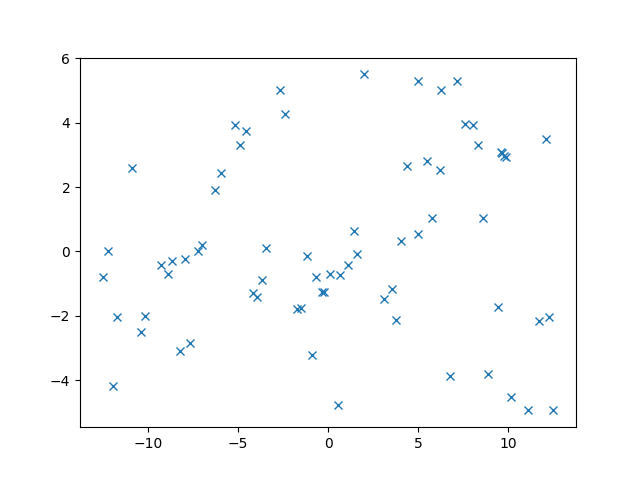

In [10]:
slits = ['46', '51', '14', '8', '12', '16', '38', '44']  #2018
slits = ['46', '51', '19', '8', '12', '10', '38', '43']  # 2022 because 44 and 14 are not visible in 213.9. need to bee thought

plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

In [13]:
# mask = F1.to_pandas()['Internal-count'].isin(slits)
F1p = F1.to_pandas()
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# selected_slits = F1[mask.values]['Internal-count',"x_mm","y_mm","ra","dec"]
selected_slits = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1p[F1p['Internal-count'] == i],slits))))

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

assert movs.sum(axis=0)[0] <0.1
assert movs.sum(axis=0)[1] <0.1
selected_slits = selected_slits['Internal-count',"x_mm","y_mm","ra","dec"]
slit_path = vstack((selected_slits,selected_slits[::-1]) )
# slit_path['lon'] = [s.lon.deg*3600 for s in slits_coord]
# slit_path['lat'] =  [s.lat.deg*3600 for s in slits_coord]
# slit_path


slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-3.4168178  0.0965211]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-8.2399806 -3.0910898]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [5.7699403 1.0469809]

targets local coords in siderostat local frame:
EL: 152.4 arcsec ; CE: 253.0 arcsec
EL: 360.1 arcsec ; CE: 330.0 arcsec
EL: 320.4 arcsec ; CE: -168.3 arcsec
EL: 286.8 arcsec ; CE: -395.5 arcsec
EL: 194.9 arcsec ; CE: -345.0 arcsec
EL: 185.0 arcsec ; CE: -368.3 arcsec
EL: 225.2 arcsec ; CE: 129.7 arcsec
EL: 360.8 arcsec ; CE: 212.0 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 152.4 arcsec ; CE 253.0 arcsec ; image: True
EL: 207.7 arcsec ; CE 77.0 arcsec ; image: True
EL: -39.7 arcsec ;

observed slits position :

In [24]:
slits_coord_obs_det = np.array([
       [1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
#retour
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

slit_path["x_det_obs"] = slits_coord_obs_det[:,0]
slit_path["y_det_obs"] = slits_coord_obs_det[:,1]
slit_path
slit_path.write("/tmp/slit.csv")

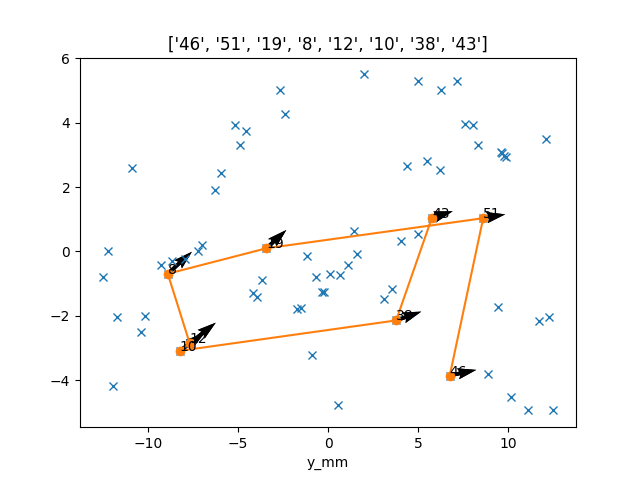

In [15]:
# TODO create some quiver of the error
plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.quiver(slit_path["x_mm"],slit_path["y_mm"],slit_path["x_det_obs"],slit_path["y_det_obs"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

In [16]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139
print("wave: ", obs_wave)
slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


### look at siderostat frame hysteresis 

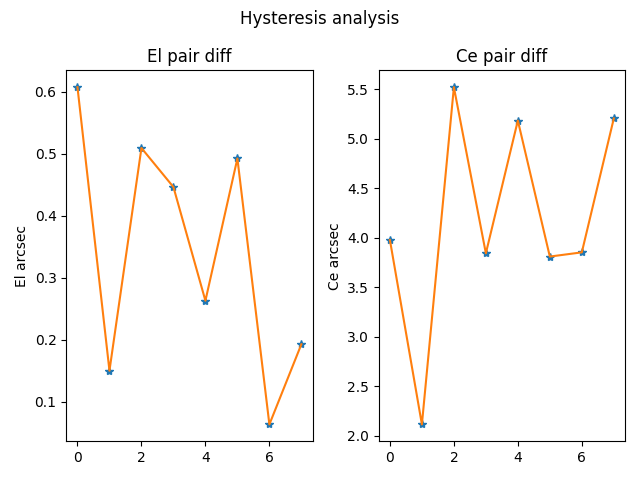

In [17]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
ax0.plot(np.abs(pair_diff[:,0]),'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
ax1.plot(np.abs(pair_diff[:,1]),'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()


## 11- Note open-mask guider ref point
## 12- Update model with observed slit positions

In [18]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )



Fitting rotation, translation and magnification
gamma: 1.2081573545994773
theta: 406.4474233456848 arcmin
dx: 180.04508223352735 arcsec
dy: 139.46100887418137 arcsec
variances: [4.09540881e-04 1.40789784e+00 3.31397948e-01 3.31397948e-01]

residuals in arcsec: [[ 511.24688758 -131.98970989]
 [-229.06999928  -97.74353453]
 [-477.30294032  255.33038991]
 [ -75.57650109  178.80301167]
 [ 264.30939335  133.83146665]
 [ 136.27798266 -198.47749423]
 [ 237.13709146  -55.93045031]
 [-368.30782284  -75.47718345]
 [-368.67034615  -81.3938006 ]
 [ 237.12670361  -60.20782152]
 [ 136.88673108 -202.69192645]
 [ 264.66264491  128.09376253]
 [ -75.01977994  183.04909881]
 [-476.63716408  261.32820896]
 [-228.97718066 -100.14703858]
 [ 511.9142997  -136.37697897]]
max residual in EL,CE 511.9, 261.3 arcsec
mean residual in EL,CE 321.7, 155.8 arcsec


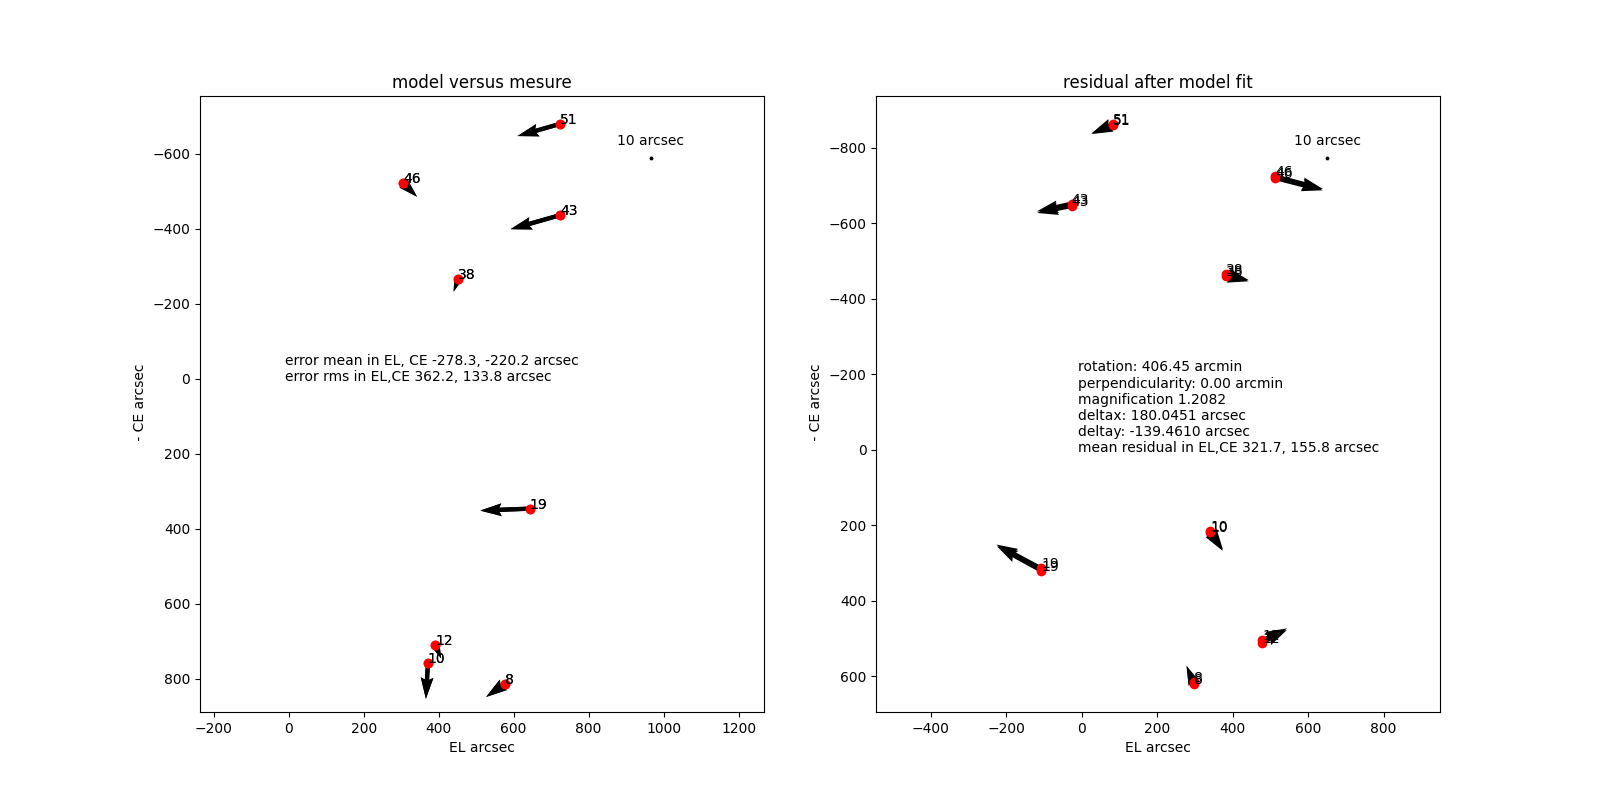

In [19]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor, residuals = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

### save corrected model for future use (eg redo the clalib on same field)

In [20]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl')

## 13 - Rotate carousel to science mask
## 14 - Note open-mask guider ref point
## 15 - Check corrected model through science mask

In [21]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-3.4168178  0.0965211]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-8.2399806 -3.0910898]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [5.7699403 1.0469809]

targets local coords in siderostat local frame:
EL: 311.6 arcsec ; CE: 224.3 arcsec
EL: 573.7 arcsec ; CE: 288.4 arcsec
EL: 452.8 arcsec ; CE: -308.2 arcsec
EL: 378.9 arcsec ; CE: -578.0 arcsec
EL: 275.3 arcsec ; CE: -504.2 arcsec
EL: 259.9 arcsec ; CE: -530.9 arcsec
EL: 381.5 arcsec ; CE: 65.1 arcsec
EL: 557.3 arcsec ; CE: 145.7 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 311.6 arcsec ; CE 224.3 arcsec ; image: True
EL: 262.2 arcsec ; CE 64.1 arcsec ; image: True
EL: -120.9 arcsec ;


## 16 - Note science-mask guider ref point
## 17 - Go through the Star sequence 
gc - s8 - s25 - s31

In [36]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits').to_pandas()

stars = [8, 25, 31]
selected_stars = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1_stars[F1_stars['Internal count'] == i],stars))))

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)
stars_path = vstack((selected_stars,selected_stars[::-1]) )
selected_stars['lon'] = [s.lon.deg*3600 for s in stars_coord]
selected_stars['lat'] =  [s.lat.deg*3600 for s in stars_coord]
# selected_stars.write("/tmp/stars.csv")
selected_stars['Internal count',
 'RA',
 'DEC',
 'X',
 'Y',
 'GAIA gband',
 'SDSS gband',
 'SDSS rband',
 'Xguider',
 'Yguider'].write("/tmp/stars.csv")
# stars_path


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 273.2 arcsec ; CE: -270.5 arcsec
EL: 316.5 arcsec ; CE: -63.7 arcsec
EL: 254.0 arcsec ; CE: 1.8 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 273.2 arcsec ; CE -270.5 arcsec ; image: True
EL: 43.3 arcsec ; CE 206.9 arcsec ; image: True
EL: -62.5 arcsec ; CE 65.5 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 62.5 arcsec ; CE -65.5 arcsec ; image: True
EL: -43.3 arcsec ; CE -236.9 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -273.2 arcsec ; CE 270.5 arcsec ; image: True



## 18 - Through focus guide star 1
## 19 - Track mask to guider changes
------------------------------------------------------

below stuf is not in the XY calib procedure, we should remove it

Re-compute model (thermal drift) ?

In [10]:
# slits_coord_obs_det2 = np.array([
#        [1967.77672211,  420.883372  ],
#        [1634.94667484,  284.99941421],
#        [1460.30889342, 1343.63228178],
#        [1774.05043782, 1625.66456504],
#        [1918.36655798, 1531.24794446],
#        [1811.96613007, 1264.73988401],
#        [1858.73062442,  652.77625595],
#        [1539.37281284,  472.87952084],
# #retour
#        [1538.92830776,  467.65309777],
#        [1858.32109489,  647.99384259],
#        [1811.64481037, 1260.92668703],
#        [1917.94530091, 1526.91879826],
#        [1773.67417428, 1628.30043431],
#        [1459.76904708, 1347.27853125],
#        [1634.04334215,  281.33418915],
#        [1966.71028008,  414.34595604]])
    
# slits_coord_obs_det2

In [11]:
# valid = np.isfinite(slits_coord_obs_det2[:,0])
# #valid = np.array([True]*8 + [False]*8)
# try:
#     obs_wave = G2UV.mask_det_map.w[0]
# except TypeError:
#     obs_wave = 0.2139
# print("wave: ", obs_wave)

# #slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
# #slits_valid = np.array(slits + slits[::-1])[valid]

In [12]:
# mid  = len(slits_coord_obs_det2)//2
# pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
# pair_diff2

# fig, (ax0,ax1) = plt.subplots(1,2)
# # plt.subplot('120')
# ax0.plot(pair_diff2[:,0],'*')
# ax0.plot(np.abs(pair_diff2[:,0]),'-')
# ax0.set_title("El pair diff")
# ax0.set_ylabel("El arcsec")
# # plt.subplot('121')
# ax1.plot(pair_diff2[:,1],'*')
# ax1.plot(np.abs(pair_diff2[:,1]),'-')
# ax1.set_title("Ce pair diff")
# ax1.set_ylabel("Ce arcsec")
# fig.suptitle("Hysteresis analysis")
# fig.tight_layout()



In [13]:
# valid2 = np.array([True]*16)
# valid2[[0,1,-1,-2]] = False
# slits2 = np.array(slits_valid)[valid2]
# print(slits2)

In [14]:
# slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
# slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
# slits_valid2 = np.array(slits + slits[::-1])[valid2]

In [15]:
# weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

# G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [16]:
# G2UVcor2 = G2UVcor2[0]
# star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


In [17]:
# movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)